# PyTorch for Computer Vision: Implementing Convolutional Neural Networks

# Introduction to Computer Vision with PyTorch

In this chapter, we will explore the fundamentals of computer vision and how PyTorch, a powerful deep learning framework, can be leveraged to build and train convolutional neural networks (CNNs) for various visual processing tasks. This chapter includes the following sections:

1.  Introduction to Computer Vision with PyTorch

    -   Overview of computer vision tasks

    -   Advantages of using PyTorch for computer vision

    -   Setting up the PyTorch environment

2.  Image Preprocessing and Data Loaders

    -   Loading and preprocessing image datasets

    -   Data augmentation techniques

    -   Creating custom datasets and data loaders in PyTorch

3.  Convolutional Neural Networks (CNNs) Fundamentals

    -   Architecture of CNNs

    -   Convolutional layers, pooling layers, and activation functions

    -   Understanding receptive fields and feature maps

4.  Building CNN Models in PyTorch

    -   Defining CNN architectures using PyTorch modules

    -   Initializing and training CNN models

    -   Techniques for improving model performance (e.g., batch normalization, dropout)

5.  Transfer Learning and Fine-tuning

    -   Leveraging pre-trained CNN models

    -   Fine-tuning models for specific tasks

    -   Freezing and unfreezing layers during training

6.  Object Detection and Localization

    -   Overview of object detection tasks

    -   Implementing object detection models (e.g., YOLO, SSD)

    -   Evaluating object detection performance

7.  Semantic Segmentation

    -   Introduction to semantic segmentation

    -   Architectures for semantic segmentation (e.g., FCN, U-Net)

    -   Training and evaluating segmentation models

8.  Visualization and Interpretability

    -   Visualizing CNN activations and feature maps

    -   Techniques for understanding CNN predictions (e.g., Grad-CAM)

    -   Interpreting and debugging CNN models

9.  Advanced Topics and Applications

    -   Handling imbalanced datasets

    -   Dealing with small datasets and data augmentation strategies

    -   Domain-specific applications (e.g., medical imaging, satellite imagery)

10. Conclusion and Future Directions

    -   Recap of key concepts and techniques

    -   Emerging trends and research directions in computer vision with PyTorch

    -   Resources for further learning and exploration

## Overview of Computer Vision Tasks

Computer vision encompasses a wide range of tasks that enable computers to interpret and understand visual information from images and videos. Some common computer vision tasks include:

-   Image Classification: Assigning labels or categories to an input image based on its content.
-   Object Detection: Identifying and localizing specific objects within an image.
-   Semantic Segmentation: Assigning a class label to each pixel in an image, effectively segmenting the image into meaningful regions.
-   Instance Segmentation: Detecting and segmenting individual instances of objects in an image.
-   Image Captioning: Generating textual descriptions of the content in an image.
-   Facial Recognition: Identifying or verifying individuals based on their facial features.

These tasks have numerous real-world applications, such as autonomous vehicles, medical image analysis, surveillance systems, and more.

## Advantages of Using PyTorch for Computer Vision

PyTorch has gained significant popularity among researchers and practitioners in the field of computer vision due to its numerous advantages:

1.  **Dynamic Computational Graph**: PyTorch uses a dynamic computational graph, which allows for flexible and intuitive programming. This is particularly useful for building and modifying complex neural network architectures.

2.  **Imperative Programming Style**: PyTorch follows an imperative programming style, which makes the code more readable and easier to debug compared to declarative programming frameworks.

3.  **Strong GPU Acceleration**: PyTorch is designed to leverage the power of GPUs for accelerated computations, enabling faster training and inference of deep learning models.

4.  **Rich Ecosystem and Community Support**: PyTorch has a thriving ecosystem with a wide range of pre-trained models, extensions, and community contributions, making it easier to build and deploy computer vision solutions.

5.  **Integration with Python Scientific Stack**: PyTorch seamlessly integrates with popular scientific computing libraries in Python, such as NumPy and SciPy, allowing for efficient data manipulation and numerical operations.

## Setting up the PyTorch Environment

To get started with PyTorch for computer vision, you need to set up your development environment. Here are the steps to install PyTorch:

1.  Ensure that you have Python installed (version 3.6 or higher is recommended).

2.  Open a terminal or command prompt and run the following command to install PyTorch:

    ```{bash}
    pip install torch torchvision
    ```

3.  Verify the installation by running the following Python code:

In [1]:
#| md-indent: '    '
import torch
print(torch.__version__)

2.1.2+cu121


If the installation is successful, it will print the version number of PyTorch.

4.  (Optional) If you have a CUDA-capable GPU and want to utilize its power, ensure that you have the appropriate NVIDIA drivers and CUDA toolkit installed. PyTorch will automatically detect and use the GPU if available.

With PyTorch installed, you are now ready to embark on your journey into the world of computer vision using this powerful framework.

In the next sections, we will dive deeper into image preprocessing, data loaders, CNN architectures, and various computer vision tasks that can be accomplished using PyTorch. Get ready to unleash the potential of deep learning for visual processing!

## Image Preprocessing and Data Loaders

In this section, we will explore the essential steps of image preprocessing and data loading in PyTorch. These steps are crucial for preparing your image data before feeding it into convolutional neural networks (CNNs) for training and inference.

### Loading and Preprocessing Image Datasets

PyTorch provides the `torchvision` package, which offers a convenient way to load and preprocess popular image datasets. Some commonly used datasets include:

-   MNIST: Handwritten digit dataset
-   CIFAR-10 and CIFAR-100: Datasets of 32x32 color images in 10 and 100 classes, respectively
-   ImageNet: Large-scale dataset with millions of images across thousands of categories

To load a dataset using `torchvision`, you can use the corresponding dataset class. For example, to load the CIFAR-10 dataset (60,000 images in 10 classes):

In [25]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),    # Converts image to tensor and scales to [0, 1].
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))   # Normalizes tensor to range [-1, 1].
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

Files already downloaded and verified


In this example, we define a transformation pipeline using `transforms.Compose` to convert the images to tensors and normalize them. We then load the CIFAR-10 training set using `datasets.CIFAR10` and create a data loader with a specified batch size and other parameters. We can plot the first batch of the images:

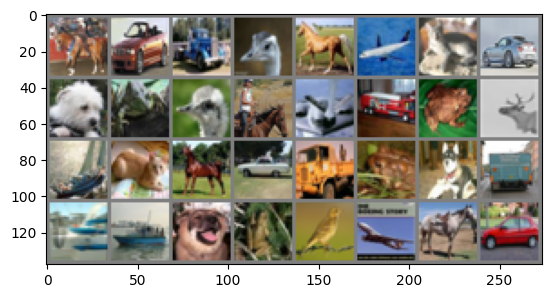

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Function to unnormalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()  # tensor to numpy
    # (H, W, C) is the standard format for displaying images using libraries like matplotlib
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # from (C, H, W) to (H, W, C)
    plt.show()

# Get the first batch of images and labels
images, labels = next(iter(trainloader))

# Display the images
imshow(torchvision.utils.make_grid(images))

### Loading Image Data and Labels from a Folder in PyTorch

To load image data and labels from a folder in PyTorch, you can use the `torchvision.datasets.ImageFolder` class, which is designed to handle datasets where images are organized in a directory structure. Here’s a step-by-step guide:

#### Directory Structure

Ensure your images are organized in a directory structure where each class has its own subdirectory:

```         
root_dir/
    class1/
        img1.png
        img2.png
        ...
    class2/
        img1.png
        img2.png
        ...
```

#### Code Example

Here’s how you can load the images and labels using PyTorch.

In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images
])

# Load the dataset
dataset = datasets.ImageFolder(root='images/classification', transform=transform)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)

# Iterate through the DataLoader
for images, labels in dataloader:
    print(images.shape)  # Shape: (batch_size, 3, 128, 128)
    print(labels.shape)
    print(labels)        # Labels for the batch
    break  # Just to demonstrate loading the first batch

torch.Size([32, 3, 128, 128])
torch.Size([32])
tensor([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 1, 1, 1])


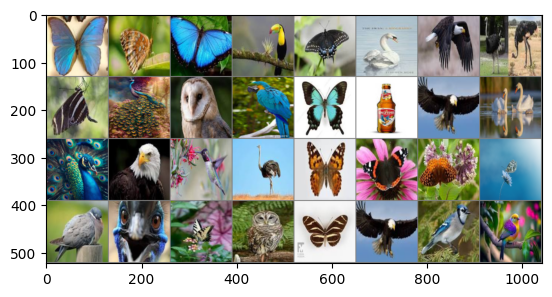

In [7]:
imshow(torchvision.utils.make_grid(images))

### Data Augmentation Techniques

Data augmentation is a technique used to artificially expand the training dataset by applying various transformations to the images. This helps in improving the model's generalization and reducing overfitting. Some common data augmentation techniques include:

-   Random cropping: Randomly crop a portion of the image
-   Random flipping: Flip the image horizontally or vertically
-   Random rotation: Rotate the image by a random angle
-   Color jittering: Randomly adjust the brightness, contrast, saturation, and hue of the image

PyTorch's `torchvision.transforms` module provides a wide range of transformations that can be easily incorporated into the data preprocessing pipeline. For example:

In [ ]:
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In this example, we apply random cropping, random horizontal flipping, and then convert the image to a tensor and normalize it.

### Creating Custom Datasets and Data Loaders

In addition to using built-in datasets, you can create your own custom datasets in PyTorch. This is particularly useful when working with your own image data. To create a custom dataset, you need to define a class that inherits from `torch.utils.data.Dataset` and implement the required methods, such as `__len__` and `__getitem__`.

Here's an example of creating a custom dataset:

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image = Image.open(self.image_paths[index])
        if self.transform:
            image = self.transform(image)
        return image

In this example, the `CustomDataset` class takes a list of image paths and an optional transform as input. The `__len__` method returns the total number of images, and the `__getitem__` method loads an image at a given index and applies the specified transformations.

Once you have defined your custom dataset, you can create a data loader using `torch.utils.data.DataLoader` to efficiently load and batch the data during training and inference.

By leveraging PyTorch's data loading and preprocessing capabilities, you can efficiently prepare your image data for training CNNs. In the next section, we will delve into the fundamentals of convolutional neural networks and their architecture.

## Convolutional Neural Networks (CNNs) Fundamentals

Convolutional Neural Networks (CNNs) have revolutionized the field of computer vision and have become the go-to architecture for various visual processing tasks. In this section, we will explore the fundamental concepts and building blocks of CNNs.

### Architecture of CNNs

A typical CNN architecture consists of several layers stacked together to learn hierarchical representations of visual data. The main components of a CNN are:

1.  **Convolutional Layers**: These layers perform convolution operations on the input data using learnable filters (kernels). The filters slide over the input, capturing local patterns and features.

2.  **Pooling Layers**: Pooling layers downsample the spatial dimensions of the feature maps, reducing the computational complexity and providing translation invariance.

3.  **Activation Functions**: Activation functions introduce non-linearity into the network, enabling it to learn complex patterns and relationships. Common activation functions include ReLU (Rectified Linear Unit), sigmoid, and tanh.

4.  **Fully Connected Layers**: After the convolutional and pooling layers, the extracted features are flattened and passed through one or more fully connected layers for high-level reasoning and classification.

The architecture of a CNN is designed to automatically learn hierarchical representations of visual data, starting from low-level edges and textures in the early layers to high-level semantic concepts in the later layers.

### Convolutional Layers, Pooling Layers, and Activation Functions

Let's dive deeper into the key components of CNNs:

#### Convolutional Layers

Convolutional layers are the core building blocks of CNNs. They consist of learnable filters that convolve over the input data, performing element-wise multiplications and summing the results. The filters capture local patterns and features, such as edges, corners, and textures.

The size and number of filters, as well as the stride and padding, are hyperparameters that can be adjusted to control the receptive field and the spatial dimensions of the output feature maps.

![Example of a convolutional layer](images/conv_layer.png){fig-align="center"}

#### Pooling Layers

Pooling layers are used to downsample the spatial dimensions of the feature maps. The most common pooling operations are max pooling and average pooling. Max pooling selects the maximum value within a local neighborhood, while average pooling computes the average value.

Pooling layers help to reduce the computational complexity, provide translation invariance, and increase the receptive field of subsequent layers.

![Example of a max pooling layer](images/pooling.png){fig-align="center"}

#### Activation Functions

Activation functions introduce non-linearity into the network, allowing it to learn complex patterns and decision boundaries. The most commonly used activation function in CNNs is the Rectified Linear Unit (ReLU), defined as:

```         
ReLU(x) = max(0, x)
```

ReLU activation helps to alleviate the vanishing gradient problem and promotes sparsity in the network.

Other activation functions, such as sigmoid and tanh, can also be used depending on the specific requirements of the task.

### Understanding Receptive Fields and Feature Maps

Receptive fields and feature maps are important concepts in understanding how CNNs process visual information.

#### Receptive Fields

The receptive field of a neuron in a CNN refers to the **region in the input space that influences the activation of that neuron**. As the network grows deeper, the receptive field of neurons in higher layers covers larger regions of the input image, allowing them to capture more global and semantic information.

#### Feature Maps

At each layer of a CNN, the output is a set of feature maps. Each feature map represents the activation of a specific filter applied to the input. The number of feature maps in a layer corresponds to the number of filters in that layer.

As the network progresses, the feature maps capture increasingly abstract and high-level representations of the input data.

By stacking multiple convolutional and pooling layers, CNNs can learn rich and hierarchical representations of visual data, enabling them to effectively solve various computer vision tasks.

In the next section, we will explore how to build and train CNN models using PyTorch, leveraging the power of this deep learning framework for visual processing tasks.

## Building CNN Models in PyTorch

Now that we have a solid understanding of the fundamentals of Convolutional Neural Networks (CNNs), let's dive into building CNN models using PyTorch. PyTorch provides a flexible and intuitive framework for defining and training CNN architectures.

### Defining CNN Architectures using PyTorch Modules

In PyTorch, CNN architectures are defined using a combination of pre-built modules and custom layers. The `torch.nn` module provides a wide range of building blocks for constructing neural networks.

Here's an example of defining a simple CNN architecture using PyTorch modules:

In [13]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(32 * 32 * 32, num_classes)

    def forward(self, x):
        # print(x.shape)
        x = self.conv1(x)
        x = self.relu(x)
        # print(x.shape)
        x = self.maxpool(x)
        # print(x.shape)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        # print(x.shape)
        x = self.fc(x)
        return x

In [14]:
myCNN_model = SimpleCNN(10)

for image, label in dataloader:
    print(image.shape)
    y = myCNN_model(image)
    print(y.shape)
    break

torch.Size([32, 3, 128, 128])
torch.Size([32, 10])


In [23]:
n = (3*3*3)*16+16
n += (3*3*16)*32+32
n += (32*32*32*10)+10
print(n)
total_params = sum(p.numel() for p in myCNN_model.parameters())
print(f"Number of parameters: {total_params}")

332778
Number of parameters: 332778


In this example, we define a `SimpleCNN` class that inherits from `nn.Module`. The `__init__` method initializes the layers of the CNN, including convolutional layers (`nn.Conv2d`), activation functions (`nn.ReLU`), pooling layers (`nn.MaxPool2d`), and fully connected layers (`nn.Linear`).

The `forward` method defines the forward pass of the CNN, specifying how the input data flows through the layers. The `view` function is used to flatten the feature maps before passing them to the fully connected layer.

### Initializing and Training CNN Models

Once the CNN architecture is defined, we need to initialize the model and train it on a dataset. PyTorch provides an intuitive way to perform these steps.

Here's an example of initializing and training a CNN model:

In this example, we create an instance of the `SimpleCNN` model, specifying the number of classes. We define the loss function (`nn.CrossEntropyLoss`) and the optimizer (`torch.optim.Adam`) for training the model.

We then iterate over the training data using a data loader (`train_loader`) for a specified number of epochs. For each batch of images and labels, we perform the following steps:

1.  Zero the gradients of the optimizer.
2.  Forward pass: Pass the images through the model to get the predicted outputs.
3.  Compute the loss between the predicted outputs and the true labels.
4.  Backward pass: Compute the gradients of the loss with respect to the model parameters.
5.  Update the model parameters using the optimizer.





### Techniques for Improving Model Performance

There are several techniques that can be used to improve the performance of CNN models:

1.  **Batch Normalization**: Batch normalization is a technique that normalizes the activations of a layer, reducing the internal covariate shift and improving the stability of training. It can be added as a module (`nn.BatchNorm2d`) after convolutional layers.

2.  **Dropout**: Dropout is a regularization technique that randomly drops out a fraction of the activations during training, preventing overfitting. It can be added as a module (`nn.Dropout`) after fully connected layers.

3.  **Learning Rate Scheduling**: Adjusting the learning rate during training can help the model converge faster and achieve better performance. PyTorch provides various learning rate schedulers, such as `torch.optim.lr_scheduler.StepLR` and `torch.optim.lr_scheduler.ReduceLROnPlateau`.

4.  **Data Augmentation**: Applying data augmentation techniques, such as random cropping, flipping, and rotation, can help increase the diversity of the training data and improve the model's generalization ability.

By leveraging these techniques and experimenting with different architectures and hyperparameters, you can build powerful CNN models using PyTorch for various computer vision tasks.

In the next section, we will explore transfer learning and fine-tuning, which allow us to leverage pre-trained CNN models and adapt them to specific tasks, saving time and resources in training from scratch.

## Transfer Learning and Fine-tuning

Transfer learning is a powerful technique in deep learning that allows us to leverage pre-trained models and adapt them to specific tasks. Instead of training a CNN model from scratch, which can be time-consuming and require large amounts of labeled data, transfer learning enables us to use the knowledge gained by a model trained on a large-scale dataset and apply it to our own problem.

### Leveraging Pre-trained CNN Models

Many deep learning frameworks, including PyTorch, provide pre-trained CNN models that have been trained on large-scale datasets such as ImageNet. These models have learned rich feature representations and can be used as a starting point for various computer vision tasks.

Some popular pre-trained CNN architectures include:

-   AlexNet
-   VGG (VGG-16, VGG-19)
-   ResNet (ResNet-18, ResNet-34, ResNet-50, ResNet-101)
-   Inception (Inception-v3)
-   MobileNet


![the architecture of VGG-16](images/vgg16.png){fig-align="center"}

PyTorch's `torchvision.models` module provides a collection of pre-trained models that can be easily loaded and used for transfer learning.

Here's an example of loading a pre-trained ResNet-18 model in PyTorch:

In [31]:
from torchvision import models

resnet18 = models.resnet18(pretrained=True)
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

/home/reza/anaconda3/envs/both/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/reza/anaconda3/envs/both/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


By setting `pretrained=True`, PyTorch will download the pre-trained weights of the ResNet-18 model and initialize the model with those weights.

### Fine-tuning Models for Specific Tasks

Once we have a pre-trained model, we can adapt it to our specific task through a process called fine-tuning. Fine-tuning involves modifying the pre-trained model to suit our problem and training it on our own dataset.

There are two common approaches to fine-tuning:

1.  **Feature Extraction**: In this approach, we freeze the weights of the pre-trained model's convolutional layers and only train the newly added fully connected layers specific to our task. This allows us to leverage the pre-trained model's feature extraction capabilities while adapting the classifier to our problem.

2.  **Full Fine-tuning**: In this approach, we allow the weights of the entire pre-trained model to be updated during training. This enables the model to adapt its feature representations to our specific task, potentially leading to better performance.

Here's an example of fine-tuning a pre-trained ResNet-18 model for a custom classification task:

``` python
resnet18 = models.resnet18(pretrained=True)
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = resnet18(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
```

In this example, we replace the last fully connected layer of the pre-trained ResNet-18 model with a new linear layer specific to our problem. We then define the loss function and optimizer, and train the model on our dataset.

### Freezing and Unfreezing Layers during Training

When fine-tuning a pre-trained model, we can choose to freeze certain layers to prevent their weights from being updated during training. This is particularly useful when we want to preserve the pre-trained feature representations and only adapt the classifier.

To freeze the weights of a layer in PyTorch, we can set its `requires_grad` attribute to `False`:

``` python
for param in resnet18.parameters():
    param.requires_grad = False
```

This will freeze all the layers of the ResNet-18 model. We can then selectively unfreeze the layers we want to fine-tune by setting their `requires_grad` attribute to `True`.

By leveraging transfer learning and fine-tuning techniques, we can quickly adapt pre-trained CNN models to our specific tasks, even with limited labeled data. This approach has proven to be highly effective in various computer vision applications.


### An example of fine tuning and drop-out layer


In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to VGG-16 input size
    transforms.Grayscale(num_output_channels=3),  # Convert to RGB
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
trainloader = DataLoader(trainset, batch_size=16, shuffle=False, num_workers=2, sampler=torch.utils.data.SubsetRandomSampler(range(100)))
testloader = DataLoader(testset, batch_size=16, shuffle=False, num_workers=2, sampler=torch.utils.data.SubsetRandomSampler(range(10)))

# VGG-16 Model (Without Dropout)
class VGG16_NoDropout(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16_NoDropout, self).__init__()
        self.vgg16 = torchvision.models.vgg16(weights=torchvision.models.VGG16_Weights.DEFAULT)
        # Freeze all layers except the last fully connected layer
        for param in self.vgg16.parameters():
            param.requires_grad = False

        # Replace the last fully connected layer for our classification task
        self.vgg16.classifier[6] = nn.Linear(4096, num_classes)

    def forward(self, x):
        x = self.vgg16(x)
        return x

# VGG-16 Model (With Dropout)
class VGG16_WithDropout(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16_WithDropout, self).__init__()
        self.vgg16 = torchvision.models.vgg16(weights=torchvision.models.VGG16_Weights.DEFAULT)
        # Freeze all layers except the last fully connected layer
        for param in self.vgg16.parameters():
            param.requires_grad = False

        # Replace the last fully connected layer with dropout
        self.vgg16.classifier[6] = nn.Sequential(
            nn.Dropout(p=0.5),  # Add dropout layer
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.vgg16(x)
        return x

# Define device (GPU if available)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'cpu'

# Initialize models
model_no_dropout = VGG16_NoDropout().to(device)
model_with_dropout = VGG16_WithDropout().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_no_dropout = torch.optim.Adam(model_no_dropout.parameters(), lr=0.001)
optimizer_with_dropout = torch.optim.Adam(model_with_dropout.parameters(), lr=0.001)

# Training function
def train(model, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(trainloader):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Print progress
            if (i + 1) % 10 == 0:
                print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(trainloader)}], Loss: {loss.item():.4f}")

# Evaluation function
def evaluate(model):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in testloader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        return accuracy

# Train and evaluate models
num_epochs = 10

print("Training model without dropout...")
train(model_no_dropout, optimizer_no_dropout, num_epochs)
accuracy_no_dropout = evaluate(model_no_dropout)
print(f"Accuracy of the model without dropout: {accuracy_no_dropout:.2f}%")

print("Training model with dropout...")
train(model_with_dropout, optimizer_with_dropout, num_epochs)
accuracy_with_dropout = evaluate(model_with_dropout)
print(f"Accuracy of the model with dropout: {accuracy_with_dropout:.2f}%")

# Plot validation accuracy
models = ['VGG-16 without Dropout', 'VGG-16 with Dropout']
accuracies = [accuracy_no_dropout, accuracy_with_dropout]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color = ['blue', 'green'], width=0.4)
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy Comparison')
plt.show()

Training model without dropout...


KeyboardInterrupt: 





## **Advanced Topics and Applications**

In this section, we will explore some advanced topics and applications of CNN models in computer vision using PyTorch. These topics cover techniques for handling specific challenges and adapting CNN models to various domain-specific applications.

### **Handling Imbalanced Datasets**

Imbalanced datasets, where some classes have significantly fewer samples than others, pose a challenge for CNN models. Models trained on imbalanced datasets tend to be biased towards the majority classes, leading to poor performance on the minority classes.

To address this issue, several techniques can be applied:

1.  **Oversampling**: Oversampling involves increasing the number of samples in the minority classes by duplicating or generating synthetic examples. Techniques like random oversampling or SMOTE (Synthetic Minority Over-sampling Technique) can be used to balance the class distribution.

2.  **Undersampling**: Undersampling involves reducing the number of samples in the majority classes to balance the class distribution. This can be done by randomly removing samples from the majority classes or using techniques like cluster centroids to select representative samples.

3.  **Class Weighting**: Class weighting assigns higher weights to the minority classes during training, giving them more importance in the loss function. This helps the model focus on learning the features of the minority classes.

PyTorch provides utilities for handling imbalanced datasets, such as the `WeightedRandomSampler` for weighted sampling and the `torch.nn.CrossEntropyLoss` with class weights for weighted loss computation.

### **Dealing with Small Datasets and Data Augmentation Strategies**

When working with small datasets, CNN models are prone to overfitting due to the limited amount of training data. Data augmentation techniques can be used to expand the training set and improve the model's generalization ability.

Some common data augmentation techniques include:

1.  **Geometric Transformations**: Applying random rotations, translations, scaling, and flipping to the input images to create new variations.

2.  **Color Transformations**: Adjusting the brightness, contrast, saturation, and hue of the input images to simulate different lighting conditions.

3.  **Noise Injection**: Adding random noise, such as Gaussian noise or salt-and-pepper noise, to the input images to improve robustness.

4.  **Cutout and Random Erasing**: Randomly masking out regions of the input images to encourage the model to focus on other relevant features.

PyTorch provides various transforms in the `torchvision.transforms` module that can be used for data augmentation, such as `RandomRotation`, `ColorJitter`, and `RandomErasing`.

### Recap of Key Concepts and Techniques

-   CNNs are powerful deep learning models designed for processing grid-like data, such as images, and have revolutionized the field of computer vision.
-   PyTorch provides a flexible and intuitive framework for building and training CNN models, with a wide range of tools and libraries for various computer vision tasks.
-   Image preprocessing, data augmentation, and custom datasets and data loaders are crucial for preparing data for training CNN models effectively.
-   Transfer learning and fine-tuning allow leveraging pre-trained CNN models to solve specific tasks with limited training data.
-   Object detection and semantic segmentation are advanced computer vision tasks that extend beyond simple image classification and enable more detailed understanding of scenes.
-   Visualization and interpretability techniques help in understanding and debugging CNN models, providing insights into their decision-making process.
-   Advanced topics and applications, such as handling imbalanced datasets, data augmentation strategies, and domain-specific applications, require specialized techniques and considerations.


## Conclusion and Future Directions

In this chapter, we have explored the power and versatility of Convolutional Neural Networks (CNNs) for computer vision tasks using PyTorch. We started with an introduction to computer vision and the advantages of using PyTorch as a deep learning framework. We then delved into the fundamentals of CNNs, including their architecture, components, and training techniques.

Throughout the chapter, we covered various aspects of working with CNNs in PyTorch, such as image preprocessing, building custom datasets and data loaders, defining CNN architectures, and training and evaluating models. Some interesting applications of CNNs include image classification, object detection, and semantic segmentation. 

![Example of semantic segmentation](images/semantic.png)


Furthermore, we explored advanced topics and applications, including handling imbalanced datasets, dealing with small datasets through data augmentation, and adapting CNN models to domain-specific applications like medical imaging, satellite imagery, autonomous driving, and face recognition.


### Emerging Trends and Research Directions

The field of computer vision with CNNs and PyTorch is constantly evolving, with new architectures, techniques, and applications emerging regularly. Some of the current trends and research directions include:

1.  **Self-Supervised Learning**: Self-supervised learning aims to learn meaningful representations from unlabeled data by designing pretext tasks that encourage the model to capture relevant features. This approach has shown promising results in reducing the reliance on large labeled datasets.

2.  **Transformers for Computer Vision**: Transformers, originally proposed for natural language processing tasks, have recently shown impressive performance in computer vision tasks. Vision Transformers (ViTs) and their variants have achieved state-of-the-art results in image classification, object detection, and segmentation.

3.  **Neural Architecture Search (NAS)**: NAS is an automated approach to designing CNN architectures by searching for optimal configurations using techniques like reinforcement learning or evolutionary algorithms. NAS has the potential to discover novel and efficient architectures tailored to specific tasks.

4.  **Explainable AI**: Explainable AI focuses on developing techniques to make CNN models more interpretable and transparent. This includes methods for visualizing and understanding the decision-making process of CNNs, as well as generating human-understandable explanations for their predictions.

5.  **Edge Computing and Model Compression**: As CNN models become more complex and deployed on resource-constrained devices like smartphones and IoT devices, techniques for model compression and efficient inference become crucial. Research efforts are focused on developing lightweight CNN architectures, quantization techniques, and hardware-aware optimization.

6.  **Domain Adaptation and Transfer Learning**: Domain adaptation techniques aim to bridge the gap between different data distributions, enabling CNN models trained on one domain to generalize well to another. Transfer learning approaches, such as few-shot learning and meta-learning, focus on quickly adapting models to new tasks with limited training data.
